<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
The Chi-Squared Tests
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 15</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### So far hypothesis testing:
- Comparisons between groups *via the mean*

Are the populations of the northern and southern Koala heights different? 
- Compare via hypothesis testing on the mean.

- Z-tests
- t-tests

#### The need for another class of tests

Sometimes comparison of groups by mean of numerical variable overly simple or not relevant.

#### Test of Homogeneity

- Want to compare two samples by their **entire** distribution over a numerical quantity.
    - Are the corresponding population the same or different?
- Comparing two samples by their count distribution over **categorical variables**.
    - Are the corresponding population the same or different?

#### Goodness of fit
- Want to compare count distribution of of given variable (categorical or numerical) 
- from a sample to see if it follows a known/given distribution.



#### Example: Massive Multiplayer Online Role Playing Game (MMORPG) 
</br>
Choose your character wisely...
<div align = "center">
<center><img src="Images/mmorpg.png" align = "center" width="900"/></center>
</div>
    

Company running MMORPG in the U.S. 
- Testing entry into U.K. market. 
- Want to see how U.K. users choose battle classes compared to to U.S. users.

Roll out to 400 early access UK users.

Count distribution of preferred character class. 
- U.K. users:

|              |  Battle-Mage  |  Healer  |  Illusionist  |  Fighter  |
| ------------ | --- | --- | --- | --- |
| **UK USERS** | 50  | 100 | 180 | 70  |

#### Ton of user data on the US:

- **Battle-mage** is chosen $17\%$ of the time
- **Healer** is chosen $25\%$ of the time
- **Illusionist** is chosen $39\%$ of the time
- **Fighter** is chosen $19\%$ of the time

Compute expected counts in 400 user trial:
- U.S. users:

|              |  Battle-Mage  |  Healer  |  Illusionist  |  Fighter  |
| ------------ | --- | --- | --- | --- |
| **US USERS** | 68  | 100 | 156 | 76  |

In a handy dandy dataframe:

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.array([(50,68),(100,100), (180,156), (70,76)]).T
count_table = pd.DataFrame(data, index = ['UK', 'US'], columns = ['Battle-Mage', 'Healer', 'Illusionist', 'Fighter'] )

In [19]:
count_table

,Battle-Mage,Healer,Illusionist,Fighter
UK,50,100,180,70
US,68,100,156,76


They look kind of similar in pattern:
- But can we say that they are drawn from the same distribution?

Step 1: Get a metric that quantifies the difference in these counts:

In [20]:
count_table

,Battle-Mage,Healer,Illusionist,Fighter
UK,50,100,180,70
US,68,100,156,76


- $O_i$: observed frequency in bin $i$
- $E_i$: expected frequency in bin $i$

Define the $X^2$ statistic:

 $$ X^2 =  \sum_i\frac{(O_i - E_i)^2}{E_i} $$


- This metric tests the squared distance between observed and expected distributions.
- Squared penalizes going above or below expected count.


 $$ X^2 =  \sum_i\frac{(O_i - E_i)^2}{E_i} $$


**Denominator is crucial also**

- Regions with low expected count treated same as those with high expected count.

#### Step 2: calculating the chi-squared statistic:


In [21]:
count_table

,Battle-Mage,Healer,Illusionist,Fighter
UK,50,100,180,70
US,68,100,156,76


 $$ X^2 =  \sum_i\frac{(O_i - E_i)^2}{E_i} $$

In [22]:
terms = np.square(count_table.loc['UK'] - count_table.loc['US'])/(count_table.loc['US'])
terms

Battle-Mage    4.764706
Healer         0.000000
Illusionist    3.692308
Fighter        0.473684
dtype: float64

In [23]:
Xsquared = np.sum(terms)
Xsquared

8.930697785186949

#### Step 3: Modeling with a distribution

 $$ X^2 =  \sum_i\frac{(O_i - E_i)^2}{E_i} $$

The $X^2$ statistic follows the $\chi^2$ distribution:
- Note: $X^2$ always positive. 
- Only one-sided test.

$\chi^2$ distribution: 
- only has one argument: the degrees of freedom

The degrees of freedom different here than for t-distribution.

- t-distribution:
    - $ df = N - 1 $

- $\chi^2$-distribution (simple goodness of fit):
    - $df = k -1$
    
where $k$ is the number of categorical variables


In [24]:
# import chi-squared
from scipy.stats import chi2
from scipy import stats

For our problem k is the number of character classes (columns of our dataframe):

In [25]:
k = count_table.shape[1]
k

4

Plot the $\chi^2$-distribution for df = 3:

In [26]:
x = np.linspace(0, 12, 400)
chi_pdf_array = chi2.pdf(x, df = k - 1)

In [27]:
%%capture chisquared_simpleplot
sx2 = "{:.2f}".format(Xsquared)
plt.plot(x, chi_pdf_array)
plt.title('$\chi^2$ distribution at df = 3')
plt.xlabel('$X^2$')
plt.show()

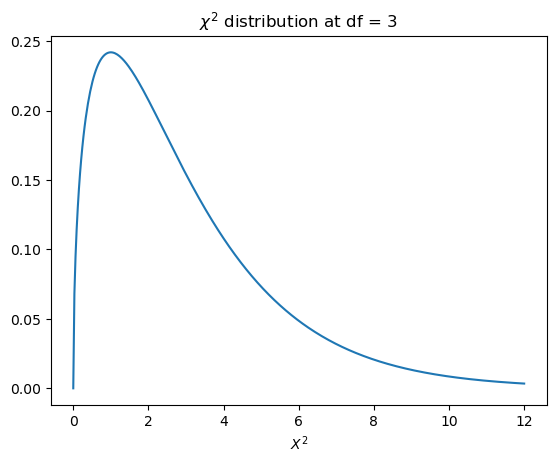

In [28]:
chisquared_simpleplot()

In [29]:
def plot_chi_squared(statistic, k, alpha):
    x = np.linspace(0, 12, 400)
    chi_pdf_array = chi2.pdf(x, df = k - 1)
    crit_stat = chi2.isf(alpha, df = k -1)
    sx2 = "{:.2f}".format(statistic)
    sxcrit = "{:.2f}".format(crit_stat)
    
    fig, ax = plt.subplots(figsize = (8,5))
    ax.plot(x, chi_pdf_array)
    ax.axvline(statistic, ls='--', c='b', label="$\chi^2$= " + str(sx2))
    ax.axvline(crit_stat, ls='--', c='r', label="$\chi_{crit}^2$= " + str(sxcrit))
    ax.fill_between(x, chi_pdf_array, where = (x > crit_stat), alpha = 0.5, color='r')
    ax.set_xlabel("$X^2$")
    ax.legend()
    plt.show()

Since this is a hypothesis test:
- Our null should have low $X^2$ value: little difference in the count distributions
- Our alternate is that there is a difference: corresponds to larger $X^2$ values.

Logic is similar other hypothesis testing:

- Set significance level $\alpha$
- $X^2$ must lie outside lower range of values.
- With probability of selecting  $X^2$ or more extreme being less than $\alpha$.

#### Inverse survival function
- similar to .ppf() but for survival function instead of cdf
- .isf(alpha, df = __) function
- gets value for which $\alpha$ probability of drawing it or greater.

Calculate $X^2_{crit}$ at significance level $\alpha = 0.05$.

In [30]:
alpha = 0.05
X2_crit = chi2.isf(alpha, df = k -1)
X2_crit

7.814727903251178

Plot critical value and our statistic, shading rejection region:

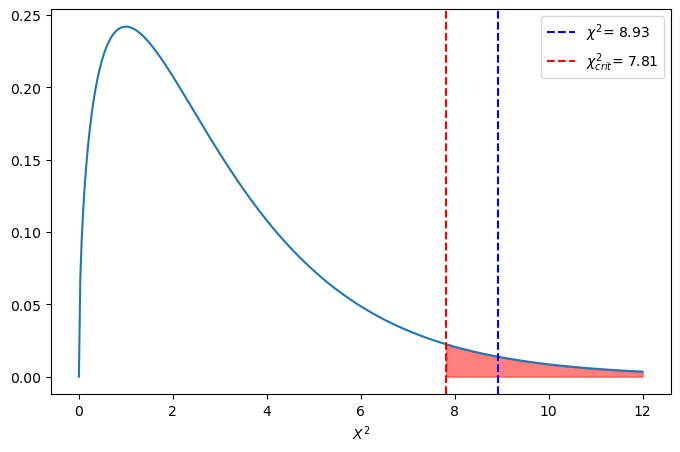

In [31]:
plot_chi_squared(Xsquared, k = 4, alpha = 0.05)

Our statistic clearly in rejection region.

Calculate p-value with survival function:

In [32]:
p_val = chi2.sf(Xsquared, df = k - 1)
p_val

0.0302266295876035

#### Easy way to do goodness of fit

In [33]:
from scipy.stats import chisquare

In [34]:
chisquare(count_table.loc['UK'], count_table.loc['US'] )

Power_divergenceResult(statistic=8.930697785186949, pvalue=0.0302266295876035)

We reject the notion that UK preferences on choosing character classes for MMORPG drawn from same distribution.

#### Test of independence
- Two variables of the sample: are they independent of each other or not? 
- $H_0$: The two variables are independent
- $H_A$ The two variables are dependent.

#### Example case

Group of respondents in Indonesia:

- Pick favorite fruit out of a choice of four.
- We also record respondent gender.

|         |  Durian    |  Bananas   |  Mangos |  Persimmons    |        
| ------- | ----- | ----- | ----- | ----- | 
| **Male**  |  68   |  102  | 246   | 105   | 
| **Female** |  86   |  88   |  216  |  89   |

Is fruit preference dependent on sex?


Two variables we want to test independence on: 
- **sex** 
- **fruit type**

- $H_0$: Sex and fruit preference independent.
- $H_A$ Sex and fruit dependent.

Can do $\chi^2$ test for this with some tweaks.

In [35]:
# load this data into a dataframe
import numpy as np
import pandas as pd
from copy import deepcopy

survey = np.array([[68,102,246,105],[86,88,216,89]])

fruit_survey_df = pd.DataFrame(survey, index = ['Male', 'Female'], 
                               columns = ['Durian', 'Bananas', 'Mangos', 'Persimmons'])

fruit_survey_df
fruit_survey_orig = deepcopy(fruit_survey_df)

Data loaded into dataframe

In [36]:
fruit_survey_df

,Durian,Bananas,Mangos,Persimmons
Male,68,102,246,105
Female,86,88,216,89


Our $X^2$ statistic now:

$$ X^2 = \sum_{ij} \frac{(O_{ij} - E_{ij})^2}{E_{ij}} $$

- $i$,$j$ index rows/columns

But how do we calculate the expected frequencies $E_{ij}$?
- Not given any probabilities/expected frequencies for the null.
- Can we estimate it from the data?

In [37]:
fruit_survey_df

,Durian,Bananas,Mangos,Persimmons
Male,68,102,246,105
Female,86,88,216,89


$E_{ij}$ would be the count if being male and female across the fruit categories doesn't matter. 

What if we sum male and female counts in each column up?


In [38]:
tot_fruit_count =fruit_survey_df.sum(axis = 0)
tot_fruit_count.name = 'All'
tot_fruit_count

Durian        154
Bananas       190
Mangos        462
Persimmons    194
Name: All, dtype: int64

But this is just a count distribution over fruits assuming sex doesn't matter

In [39]:
# Adding to our dataframe

fruit_survey_df =fruit_survey_df.append(
    tot_fruit_count)
fruit_survey_df

C:\Users\Kevin\AppData\Local\Temp\ipykernel_8280\1284229634.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fruit_survey_df =fruit_survey_df.append(


,Durian,Bananas,Mangos,Persimmons
Male,68,102,246,105
Female,86,88,216,89
All,154,190,462,194


Now, if the number of male and female respondents the same:
- Then we would have the same values in each row for a given column.
- Counts would be split 50/50
- But the number of male and female respondents are not equal.

In [40]:
# Totalnumber of males and females
sex_count = fruit_survey_df.sum(axis = 1)
sex_count

Male       521
Female     479
All       1000
dtype: int64

In [41]:
#  sanity check:
tot_fruit_count.sum()

1000

In [42]:
# append total tally by sex:
fruit_survey_df['Sex_Count'] = sex_count
fruit_survey_df

,Durian,Bananas,Mangos,Persimmons,Sex_Count
Male,68,102,246,105,521
Female,86,88,216,89,479
All,154,190,462,194,1000


#### Getting Our Expected Frequencies

Multiply count in each fruit bin by probability male or female:

 $$N_{Fruit}p_{Sex}$$
 
 - Number of counts for each fruit assuming sex doesn't matter multiplied by fraction of sex in total population.

- This is our $E_{ij}$!
- Assumes fruit selection and sex are independent: our null.

#### Compute expected frequency table

In [43]:
# get probability of drawing a respondent of a given sex
probability_sex = fruit_survey_df['Sex_Count']/fruit_survey_df.loc['All','Sex_Count']
probability_sex

Male      0.521
Female    0.479
All       1.000
Name: Sex_Count, dtype: float64

In [44]:
#calculated expected values for male and female
male_expected = fruit_survey_df.loc['All', 'Durian':'Persimmons']*probability_sex['Male']
female_expected = fruit_survey_df.loc['All', 'Durian':'Persimmons']*probability_sex['Female']

#create the expected table
expected_table = pd.concat([male_expected, female_expected], axis=1).T
expected_table.index = ['Male', 'Female']
expected_table

,Durian,Bananas,Mangos,Persimmons
Male,80.234,98.99,240.702,101.074
Female,73.766,91.01,221.298,92.926


In [45]:
fruit_survey_orig

,Durian,Bananas,Mangos,Persimmons
Male,68,102,246,105
Female,86,88,216,89


Now that we have both our observed and the expected frequencies.

Construct our $X^2$ statistic:

 $$ X^2 =  \sum_{ij}\frac{(O_{ij} - E_{ij})^2}{E_{ij}} $$

In [46]:
inter_table = (fruit_survey_orig - expected_table)**2/expected_table

Xsquared_ind = inter_table.to_numpy().sum()
Xsquared_ind

4.647312487410249

For this test of independence, also need to specify degrees of freedom for the distribution:

$$ df = (r - 1)(c -1) $$
$$df=(2-1)\cdot(4-1)=3$$.

In [47]:
degrees_of_freedom = 3

Plot chi-squared distribution with df = 3 with our statistic: 

In [48]:
%%capture plot_independence_test
from scipy import stats


x = np.linspace(
        stats.chi2.ppf(0.000001, degrees_of_freedom),
        stats.chi2.ppf(0.9999, degrees_of_freedom), 
        500
)

with plt.xkcd():    
    f, ax = plt.subplots()
    ax.set_title('chi^2 w/ df=3')
    ax.plot(x, stats.chi2.pdf(x, degrees_of_freedom), 'r-', lw=5)
    # Chi-square statistic
    ax.axvline(Xsquared_ind, ls='--', c='b', label='chi^2=4.65')
    ax.legend()
    plt.tight_layout()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

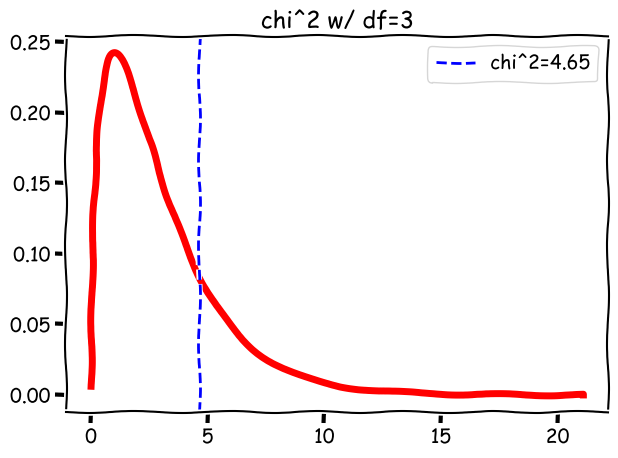

In [32]:
plot_independence_test()

In [50]:
# Note we subract since we want the area to the right of the statistic
p = stats.chi2.sf(Xsquared_ind, df=degrees_of_freedom)
p

0.19952075187952747

So in this case, we cannot reject the null hypothesis that sex and fruit type are independent.

#### Before You Ask, There _Is_ a Faster Method

And of course there's a SciPy method for this: [`scipy.stats.chi2_contingency`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

In [54]:
result = stats.chi2_contingency(fruit_survey_orig)
chi, p, dof, exp = result
result

Chi2ContingencyResult(statistic=4.647312487410241, pvalue=0.19952075187952803, dof=3, expected_freq=array([[ 80.234,  98.99 , 240.702, 101.074],
       [ 73.766,  91.01 , 221.298,  92.926]]))